# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [141]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [142]:
# Write your answer here
%matplotlib inline
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

# Guinea

In [415]:
guinea_path = DATA_FOLDER+"/ebola/guinea_data/"

guinea = []

for d in os.listdir(guinea_path):
    guinea.append(pd.read_csv(guinea_path+d, index_col=None, usecols=['Date', 'Description', 'Totals'], parse_dates=['Date']))

guinea = pd.concat(guinea)

In [416]:
guinea_cases = guinea.loc[(guinea.Description == "New cases of suspects") | (guinea.Description == "New cases of probables")
                        | (guinea.Description == "New cases of confirmed")]

guinea_cases['Totals'] = guinea_cases['Totals'].apply(pd.to_numeric)
guinea_cases['Month'] = guinea_cases.Date.dt.strftime("%B")

guinea_cases = guinea_cases.groupby(['Date', 'Month']).sum().groupby('Month').mean()

guinea_cases = guinea_cases.reindex(['August', 'September', 'October'])
guinea_cases.columns = ['Average daily new cases per month']
guinea_cases

,Average daily new cases per month
Month,
August,25.800
September,19.625
October,34.000


In [417]:
guinea_deaths = guinea.loc[(guinea.Description == "New deaths registered today") 
                          | (guinea.Description == "New deaths registered")]

guinea_deaths['Totals'] = guinea_deaths['Totals'].apply(pd.to_numeric)
guinea_deaths['Month'] = guinea_deaths.Date.dt.strftime("%B")

guinea_deaths = guinea_deaths.groupby(['Date', 'Month']).sum().groupby('Month').mean()

guinea_deaths = guinea_deaths.reindex(['August', 'September', 'October'])
guinea_deaths.columns = ['Average daily new deaths per month']

guinea_all = pd.concat([guinea_cases, guinea_deaths], axis=1)

guinea_all['country'] = "Guinea"
guinea_all

,Average daily new cases per month,Average daily new deaths per month,country
Month,,,
August,25.800,3.4000,Guinea
September,19.625,3.5625,Guinea
October,34.000,15.0000,Guinea


# Liberia

In [155]:
liberia_path = DATA_FOLDER+"/ebola/liberia_data/"

liberia = []

for d in os.listdir(liberia_path):
    liberia.append(pd.read_csv(liberia_path+d, parse_dates=['Date'], usecols=['Date', 'Variable', 'National']))

liberia = pd.concat(liberia)
#liberia = liberia.set_index(['Date','Variable'])
#liberia = liberia[liberia.index.duplicated()]
#liberia.reset_index(inplace=True)

In [157]:
liberia_cases = liberia.loc[((liberia.Variable == "New Case/s (Probable)")
                            | (liberia.Variable == "New Case/s (Suspected)")
                            | (liberia.Variable == "New case/s (confirmed)"))
                            & (liberia.National < 100)]

liberia_cases = liberia_cases.groupby(['Date']).sum()
liberia_cases = liberia_cases.groupby(liberia_cases.index.strftime('%B')).mean()

liberia_cases = liberia_cases.reindex(['June', 'July', 'August', 'September', 'October', 'November', 'December'])
liberia_cases.columns = ["Average daily new cases per month"]

liberia_cases

,Average daily new cases per month
June,5.714286
July,8.545455
August,37.222222
September,63.833333
October,45.560000
November,26.466667
December,36.000000


In [420]:
liberia_deaths = liberia.loc[liberia.Variable == "Newly reported deaths"]

liberia_deaths = liberia_deaths.groupby(liberia_deaths.Date.dt.strftime('%B')).mean()

liberia_deaths = liberia_deaths.reindex(['June', 'July', 'August', 'September', 'October', 'November', 'December'])
liberia_deaths.columns = ["Average daily new deaths per month"]

liberia_deaths.fillna("NO DATA AVAILABLE")

liberia_all = pd.concat([liberia_cases, liberia_deaths], axis=1)

liberia_all['country'] = "Liberia"
liberia_all

,Average daily new cases per month,Average daily new deaths per month,country
Date,,,
June,5.714286,2.000000,Liberia
July,8.545455,4.272727,Liberia
August,37.222222,23.222222,Liberia
September,63.833333,37.608696,Liberia
October,45.560000,28.040000,Liberia
November,26.466667,15.538462,Liberia
December,36.000000,NaN,Liberia


In [421]:
liberia2 = liberia.copy()
liberia2['Days'] = (liberia2.Date.dt.date - liberia2.Date.dt.date.iloc[0]).astype('timedelta64[D]')
liberia2.National = liberia2.National.apply(pd.to_numeric)

In [167]:
from datetime import *

def plot_data_to_days(data, column, rowString, fillna=False):
    tmp = data.loc[(data[column] == rowString)]
    if fillna:
        tmp.National.fillna(method='bfill', inplace=True)
    plt.plot(tmp['Days'], tmp['National'])

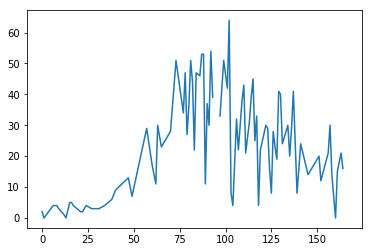

In [423]:
plot_data_to_days(liberia2, 'Variable', 'Newly reported deaths', False)

## Sierra leone


In [159]:
sl_path = DATA_FOLDER+"/ebola/sl_data/"

sl = []

for d in os.listdir(sl_path):
    sl.append(pd.read_csv(sl_path+d, parse_dates=['date'], usecols=['date', 'variable', 'National']))

sl = pd.concat(sl)

In [170]:
sl_deaths = sl.copy()

sl_deaths = sl_deaths.loc[(sl_deaths.variable.str.match(r'(death_.)'))]

sl_deaths['Month'] = sl_deaths.date.dt.strftime('%B')
sl_deaths.National = sl_deaths.National.apply(pd.to_numeric, errors='coerce')

sl_deaths = sl_deaths.groupby(['date', 'Month']).sum()
sl_deaths.National = sl_deaths.National.diff().fillna(0)
sl_deaths = sl_deaths[sl_deaths.National <= 200]

sl_deaths = sl_deaths.groupby('Month').mean()[['National']]
sl_deaths = sl_deaths.reindex(['August', 'September', 'October', 'November', 'December'])
sl_deaths.columns = ["Average daily new deaths per month"]

sl_deaths

,Average daily new deaths per month
Month,
August,5.100000
September,4.413793
October,12.538462
November,17.047619
December,42.400000


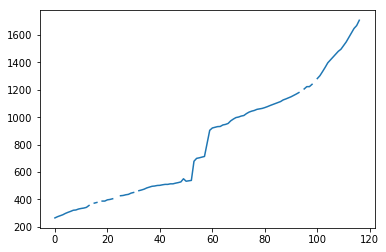

In [169]:
sl_plot = sl.copy()
sl_plot['Days'] = (sl_plot.date.dt.date - sl_plot.date.dt.date.iloc[0]).astype('timedelta64[D]')
sl_plot.National = sl_plot.National.apply(pd.to_numeric, errors='coerce')
plot_data_to_days(sl_plot, 'variable', 'death_confirmed')

In [165]:
sl_cases = sl.copy()

sl_cases = sl_cases.loc[(sl_cases.variable.str.match(r'(new_(probable|suspected|confirmed))'))]

sl_cases['Month'] = sl_cases.date.dt.strftime('%B')
sl_cases.National = sl_cases.National.apply(pd.to_numeric, errors='coerce')

sl_cases = sl_cases.groupby(['date', 'Month']).sum()

sl_cases = sl_cases.groupby('Month').mean()[['National']]
sl_cases = sl_cases.reindex(['August', 'September', 'October', 'November', 'December'])
sl_cases.columns = ["Average daily new cases per month"]
sl_cases

,Average daily new cases per month
Month,
August,27.944444
September,43.703704
October,70.928571
November,83.157895
December,68.333333


In [ ]:

sl_all = pd.concat([sl_cases, sl_deaths], axis=1)
sl_all['country'] = "Sierra Leone"
sl_all

In [439]:
ebola_all = pd.concat([guinea_all, liberia_all, sl_all], axis=0)
ebola_all['Month'] = ebola_all.index
ebola_all.set_index(['country', 'Month'])

Average daily new cases per month  \
country      Month                                          
Guinea       August                             25.800000   
             September                          19.625000   
             October                            34.000000   
Liberia      June                                5.714286   
             July                                8.545455   
             August                             37.222222   
             September                          63.833333   
             October                            45.560000   
             November                           26.466667   
             December                           36.000000   
Sierra Leone August                             29.200000   
             September                          43.310345   
             October                            70.928571   
             November                           84.000000   
             December                           68.333333   

                        Average daily new deaths per month  
country      Month                                          
Guinea       August                               3.400000  
             September                            3.562500  
             October                             15.000000  
Liberia      June                                 2.000000  
             July                                 4.272727  
             August                              23.222222  
             September                           37.608696  
             October                             28.040000  
             November                            15.538462  
             December                                  NaN  
Sierra Leone August                               5.100000  
             September                            4.413793  
             October                             12.538462  
             November                            17.047619  
             December                            42.400000

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [173]:
# Write your answer here
mb_path = DATA_FOLDER+"/microbiome/"

mb = []
mb_meta = pd.read_excel(mb_path+"metadata.xls", index_col='BARCODE', sheetname='Sheet1').fillna("unknown")

for d in (os.listdir(mb_path)):
    if d[0:3] == "MID":
        tmp = pd.read_excel(mb_path+d, sheetname='Sheet 1', header=None)
        tmp["BARCODE"] = d[0:4]
        mb.append(tmp)
        
mb = pd.concat(mb)
mb_meta

,GROUP,SAMPLE
BARCODE,,
MID1,EXTRACTION CONTROL,unknown
MID2,NEC 1,tissue
MID3,Control 1,tissue
MID4,NEC 2,tissue
MID5,Control 2,tissue
MID6,NEC 1,stool
MID7,Control 1,stool
MID8,NEC 2,stool
MID9,Control 2,stool


In [186]:
mb2 = mb.set_index(["BARCODE"])
mb2['GROUP'] = 'unknown'
mb2['SAMPLE'] = 'unknown'
mb2['GROUP'] = mb_meta['GROUP'].loc[mb2.index]
mb2['SAMPLE'] = mb_meta['SAMPLE'].loc[mb2.index]
mb2.reset_index(inplace=True)
mb2.set_index(['BARCODE', 0], inplace=True)
mb2

1  \
BARCODE 0                                                          
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...     7   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...     2   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...     3   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...     3   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...     7   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...     1   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...     1   
        Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...     1   
        Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...     1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...     1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...     4   
        Archaea "Euryarchaeota" Halobacteria Halobacter...     1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...     2   
        Archaea "Euryarchaeota" Halobacteria Halobacter...     4   
        Archaea "Euryarchaeota" Methanococci Methanococ...     1   
        Archaea "Euryarchaeota" Methanopyri Methanopyra...    12   
        Archaea "Euryarchaeota" Thermoplasmata Thermopl...     2   
        Bacteria "Actinobacteria" Actinobacteria Actino...     2   
        Bacteria "Actinobacteria" Actinobacteria Actino...     1   
        Bacteria "Actinobacteria" Actinobacteria Actino...     1   
        Bacteria "Actinobacteria" Actinobacteria Actino...     1   
        Bacteria "Actinobacteria" Actinobacteria Actino...     2   
        Bacteria "Actinobacteria" Actinobacteria Actino...    53   
        Bacteria "Actinobacteria" Actinobacteria Actino...     1   
        Bacteria "Actinobacteria" Actinobacteria Actino...     2   
        Bacteria "Actinobacteria" Actinobacteria Actino...     3   
        Bacteria "Actinobacteria" Actinobacteria Actino...     1   
        Bacteria "Actinobacteria" Actinobacteria Actino...    99   
        Bacteria "Actinobacteria" Actinobacteria Actino...    17   
        Bacteria "Actinobacteria" Actinobacteria Actino...     2   
...                                                          ...   
MID9    Bacteria "Proteobacteria" Gammaproteobacteria O...    10   
        Bacteria "Proteobacteria" Gammaproteobacteria O...     1   
        Bacteria "Proteobacteria" Gammaproteobacteria O...     1   
        Bacteria "Proteobacteria" Gammaproteobacteria P...     1   
        Bacteria "Proteobacteria" Gammaproteobacteria P...    12   
        Bacteria "Proteobacteria" Gammaproteobacteria P...     4   
        Bacteria "Proteobacteria" Gammaproteobacteria P...   805   
        Bacteria "Proteobacteria" Gammaproteobacteria P...   862   
        Bacteria "Proteobacteria" Gammaproteobacteria P...    12   
        Bacteria "Proteobacteria" Gammaproteobacteria P...  3534   
        Bacteria "Proteobacteria" Gammaproteobacteria T...     4   
        Bacteria "Proteobacteria" Gammaproteobacteria T...     1   
        Bacteria "Proteobacteria" Gammaproteobacteria T...    25   
        Bacteria "Proteobacteria" Gammaproteobacteria T...     2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...     3   
        Bacteria "Proteobacteria" Gammaproteobacteria X...     2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...     1   
        Bacteria "Proteobacteria" Gammaproteobacteria X...     3   
        Bacteria "Proteobacteria" Gammaproteobacteria X...     2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...     1   
        Bacteria "Synergistetes" Synergistia Synergista...     3   
        Bacteria "Tenericutes" Mollicutes Anaeroplasmat...     1   
        Bacteria "Tenericutes" Mollicutes Haloplasmatal...    11   
        Bacteria "Thermodesulfobacteria" Thermodesulfob...     1   
        Bacteria "Thermodesulfobacteria" Thermodesulfob...     1   
        Bacteria "Thermotogae" Thermotogae Thermotogale...    43   
        Bacteria "Thermotogae" Thermotogae Thermoto

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [78]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [119]:
# Write your answer here
titanic = pd.read_excel(DATA_FOLDER+"titanic.xls", sheetname="titanic")
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [140]:
#titanic.ticket.astype(str).str.extract(r'\D*(\d+)', expand=True)

In [120]:
titanic.age.loc[titanic.age<1] = np.nan
titanic.age = pd.cut(titanic.age, [0, 10, 20, 30, 40, 50, 60, 70, 80])

In [104]:
titanic.sex = titanic.sex.astype('category')
titanic.pclass = titanic.pclass.astype('category')
titanic.survived = titanic.survived.astype('category')

titanic.embarked.replace({'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'}, inplace=True)
titanic.embarked.fillna('Queenstown', inplace=True)
titanic.embarked = titanic.embarked.astype('category')

(array([ 323.,  277.,  709.]),
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 3 Patch objects>)

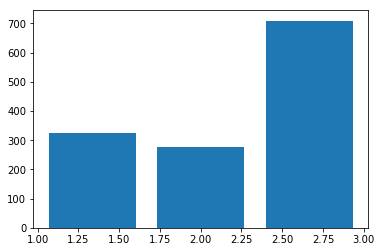

In [105]:
plt.hist(titanic.pclass, bins=3, rwidth=0.8)

([<matplotlib.axis.YTick at 0x220415626d8>,
 <a list of 7 Text yticklabel objects>)

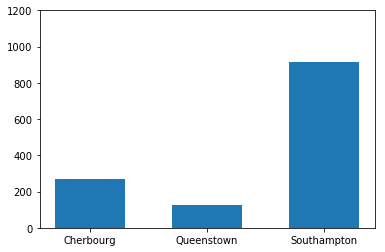

In [106]:
plt.hist(titanic.embarked.cat.codes, bins=range(4), rwidth=0.6, align='left')
plt.xticks([0, 1, 2], ('Cherbourg', 'Queenstown', 'Southampton'))
plt.yticks(range(0, titanic.embarked.size, 200))

([<matplotlib.axis.YTick at 0x220416303c8>,
 <a list of 7 Text yticklabel objects>)

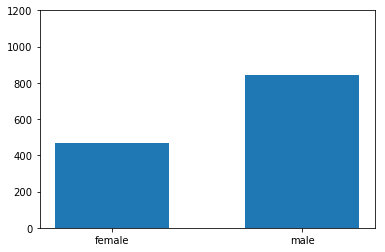

In [107]:
plt.hist(titanic.sex.cat.codes, bins=range(3), rwidth=0.6, align='left')
plt.xticks([0, 1], ('female', 'male'))
plt.yticks(range(0, titanic.embarked.size, 200))

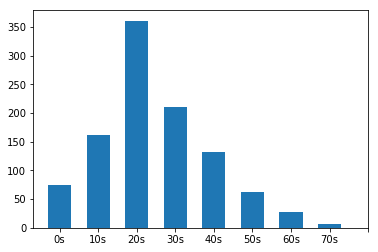

In [134]:
titanic_age_hist = titanic.age.loc[titanic.age != -1]
plt.hist(titanic_age_hist.cat.codes, bins=range(9), rwidth=0.6, align='left')
plt.xticks(range(9), ('0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s'))
plt.show()